## Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

## Load The Dataset

In [2]:
df=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Get Categorical Columns
cat_cols = [col for col in df.columns if df[col].dtype=='object']
cat_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [4]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
##Drop customer Id column
df= df.drop(['customerID'], axis=1)

In [7]:
## Change TotalCharges to numeric datatype
df['TotalCharges']= pd.to_numeric(df['TotalCharges'],errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
# display null value rows
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [9]:
# drop rows where tenure is 0
df= df.drop(labels=df[df['tenure']==0].index, axis=0)
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Exploratory dta a analysis

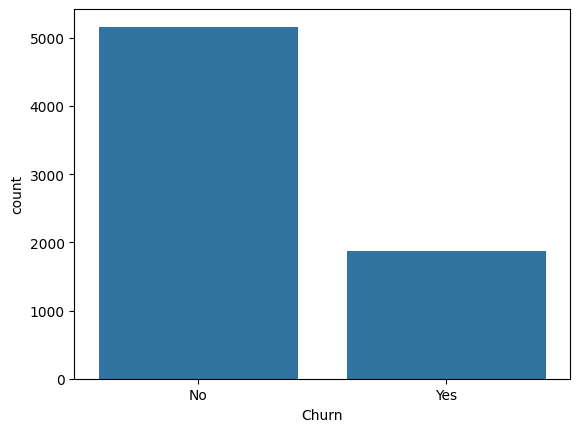

In [10]:
sns.countplot(x='Churn', data=df);

## DataSet is Slightly imbalances, suggest to use sampling techniques to balance the dataset

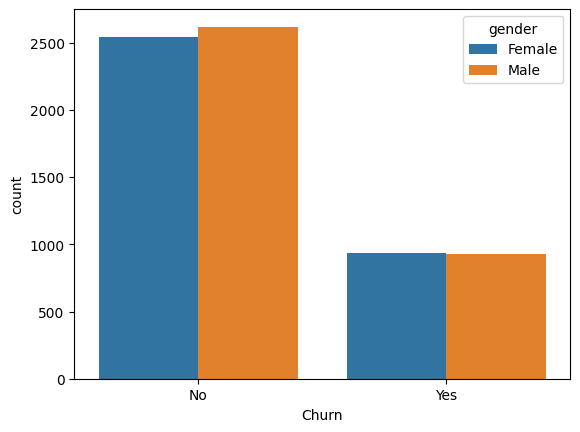

In [11]:
sns.countplot(x='Churn',hue='gender', data =df );

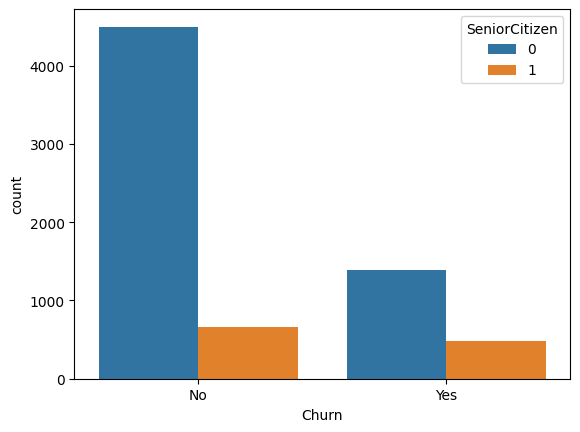

In [12]:
sns.countplot(x='Churn',hue='SeniorCitizen', data =df );

## Senior citizens are more likely to Churn

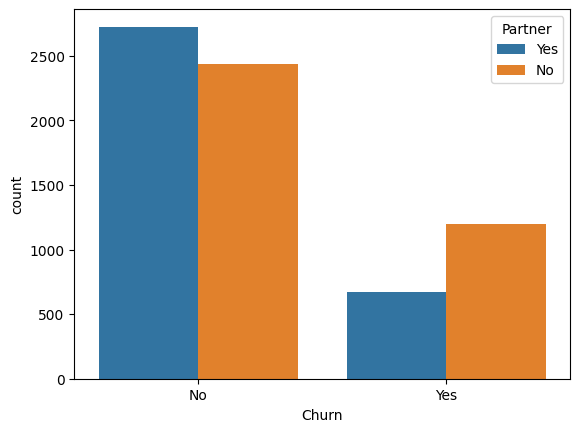

In [13]:
sns.countplot(x='Churn',hue='Partner', data =df );

## People who doesnot have partner/ Single person is more likely to churn

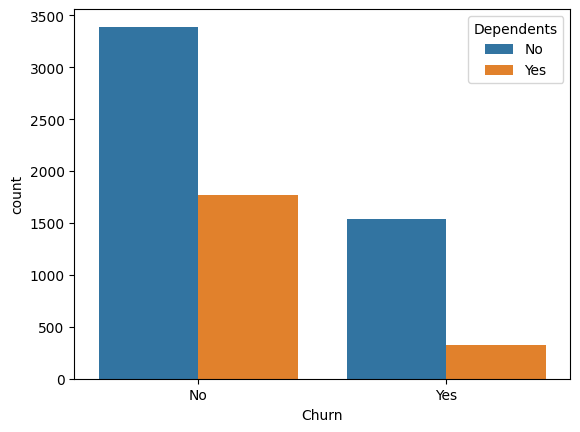

In [14]:
sns.countplot(x='Churn',hue='Dependents', data =df );

## People who doesnot have any dependece or single person are more likely to churn
## if the customer has a fmaily, all of them prefer to use same service and retension is high

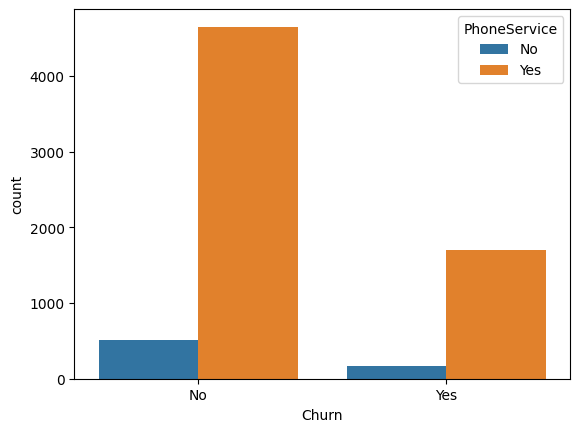

In [15]:
sns.countplot(x='Churn',hue='PhoneService', data =df );

## people who have phone sevices are more likely to churn

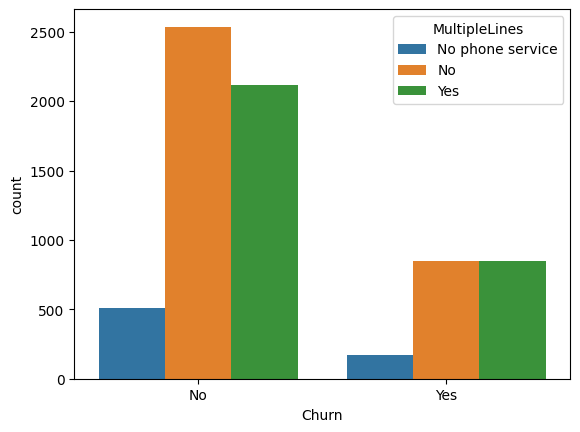

In [16]:
sns.countplot(x='Churn',hue='MultipleLines', data =df );

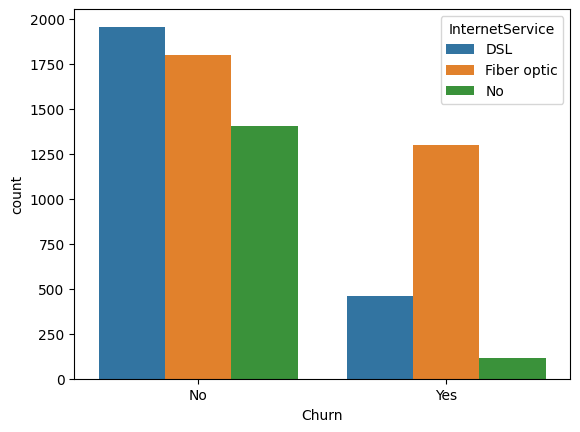

In [17]:
sns.countplot(x='Churn',hue='InternetService', data =df );

## Those who have opted for fiber optics are more likely to churn on the contrary, those who have DSL service have more retension

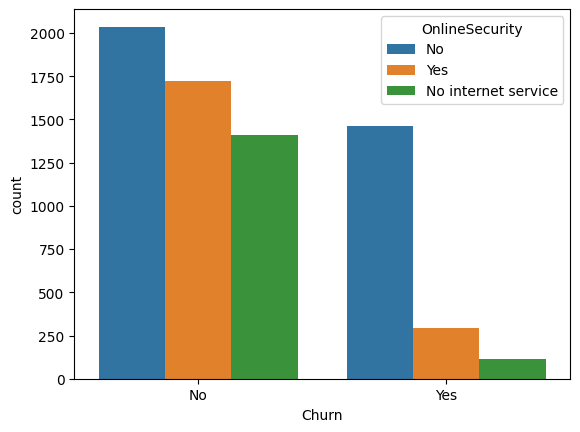

In [18]:
sns.countplot(x='Churn',hue='OnlineSecurity', data =df );

### People who dont have online security ar more likely to churn

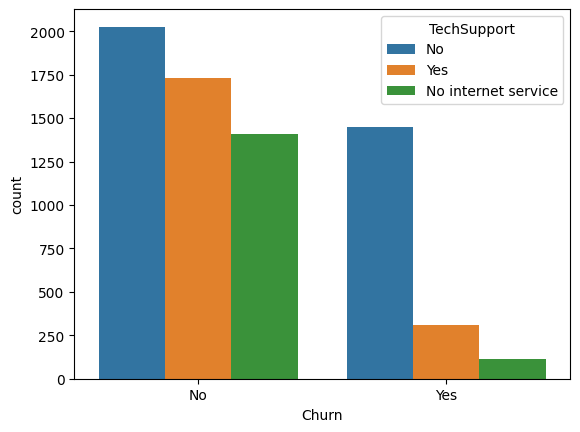

In [19]:
sns.countplot(x='Churn',hue='TechSupport', data =df );

## people who doesnot have tech support are more likely to churn

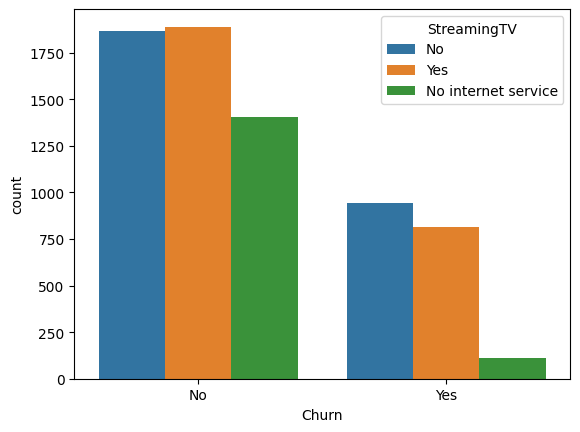

In [20]:
sns.countplot(x='Churn',hue='StreamingTV', data =df );

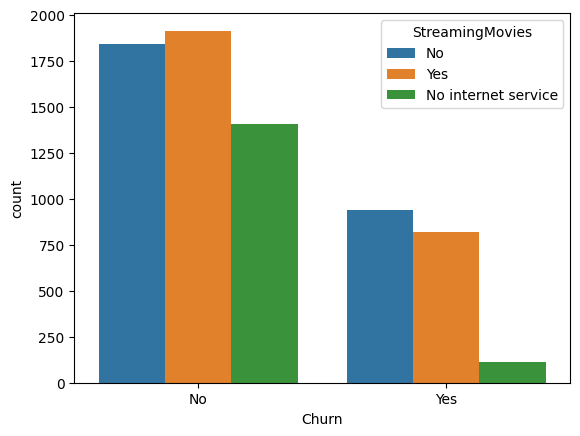

In [21]:
sns.countplot(x='Churn',hue='StreamingMovies', data =df );

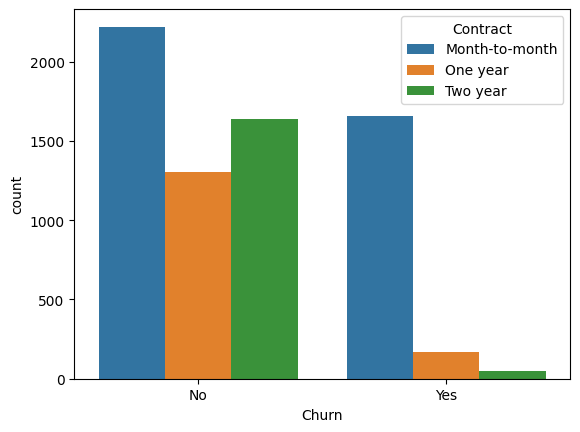

In [22]:
sns.countplot(x='Churn',hue='Contract', data =df );

## people who are on monthly contract who are more likely to churn and people who are on yearly contract less likely to churn

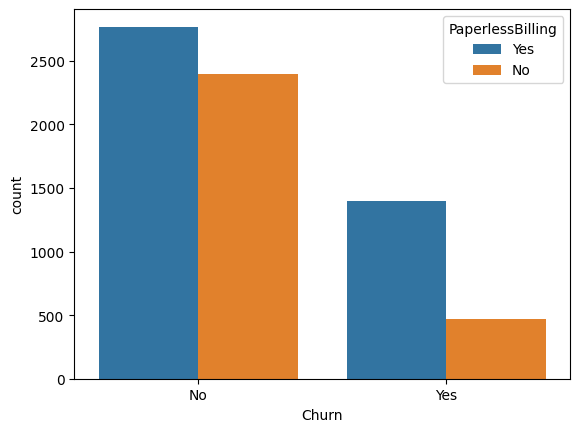

In [23]:
sns.countplot(x='Churn',hue='PaperlessBilling', data =df );

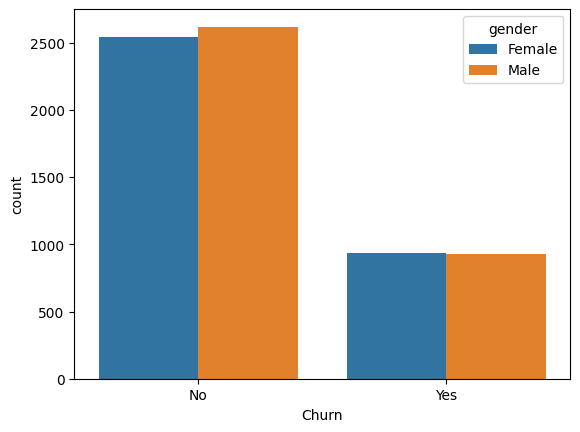

In [24]:
sns.countplot(x='Churn',hue='gender', data =df );

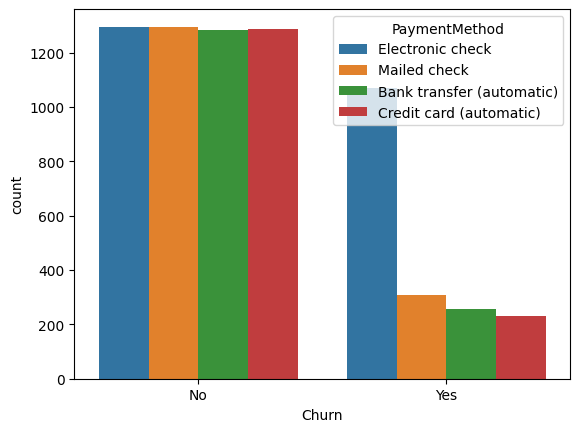

In [25]:
sns.countplot(x='Churn',hue='PaymentMethod', data =df );

## people who have opted for electonic check payment are more likely to churn

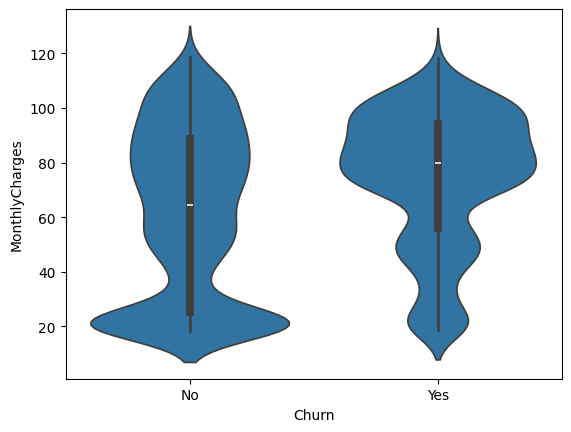

In [26]:
sns.violinplot(x='Churn', y='MonthlyCharges', data =df );

## People who have high monthly charges are more likely to churn

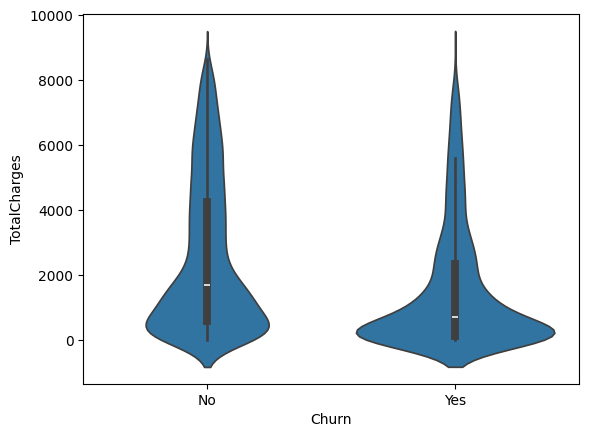

In [27]:
sns.violinplot(x='Churn', y='TotalCharges', data =df );

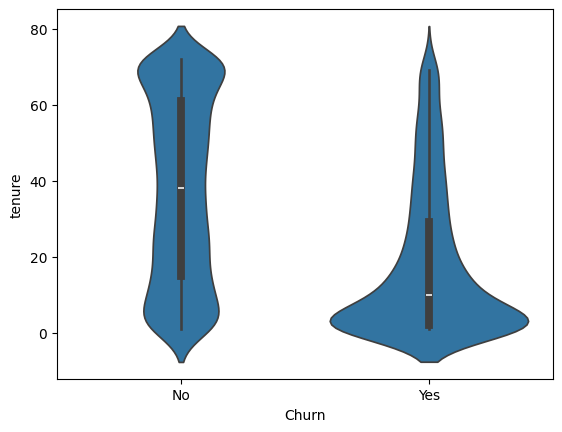

In [28]:
sns.violinplot(x='Churn', y='tenure', data =df );

## people who are on low tenure or are subscribed for less no. of months are more likely to churn

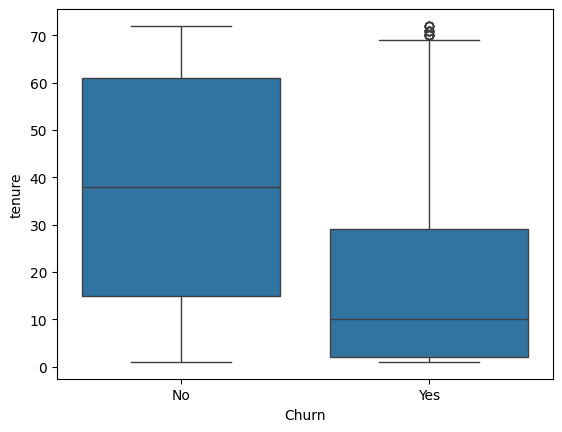

In [29]:
sns.boxplot(x='Churn', y='tenure', data =df );

<Axes: xlabel='TotalCharges', ylabel='Density'>

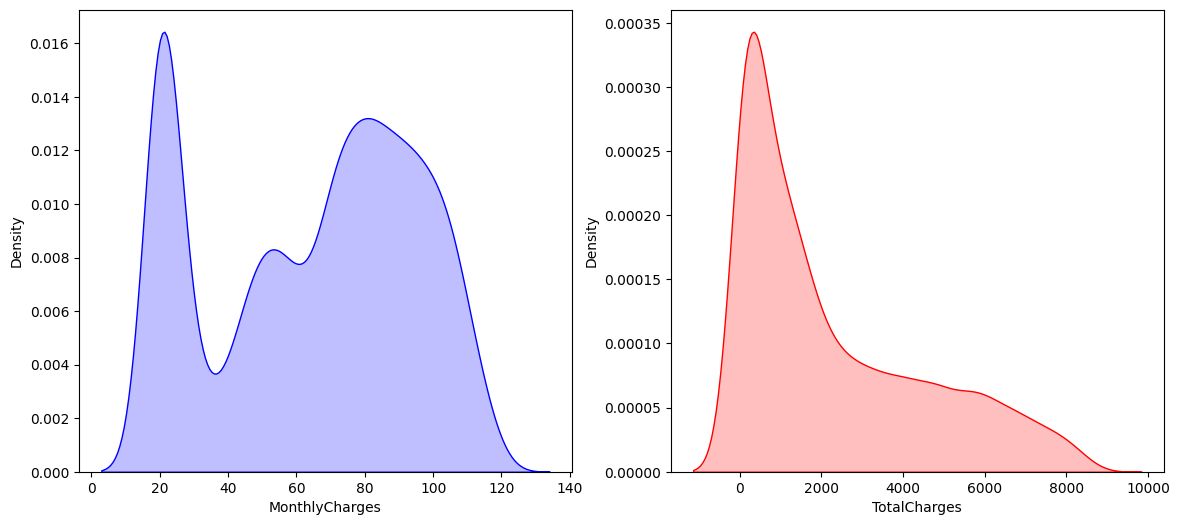

In [30]:
fig, axes = plt.subplots(1,2, figsize= (14,6))
sns.kdeplot(df['MonthlyCharges'], ax= axes[0], color='blue', shade=True)
sns.kdeplot(df['TotalCharges'], ax= axes[1], color='red', shade=True)


## Correlation Matrix

<Axes: >

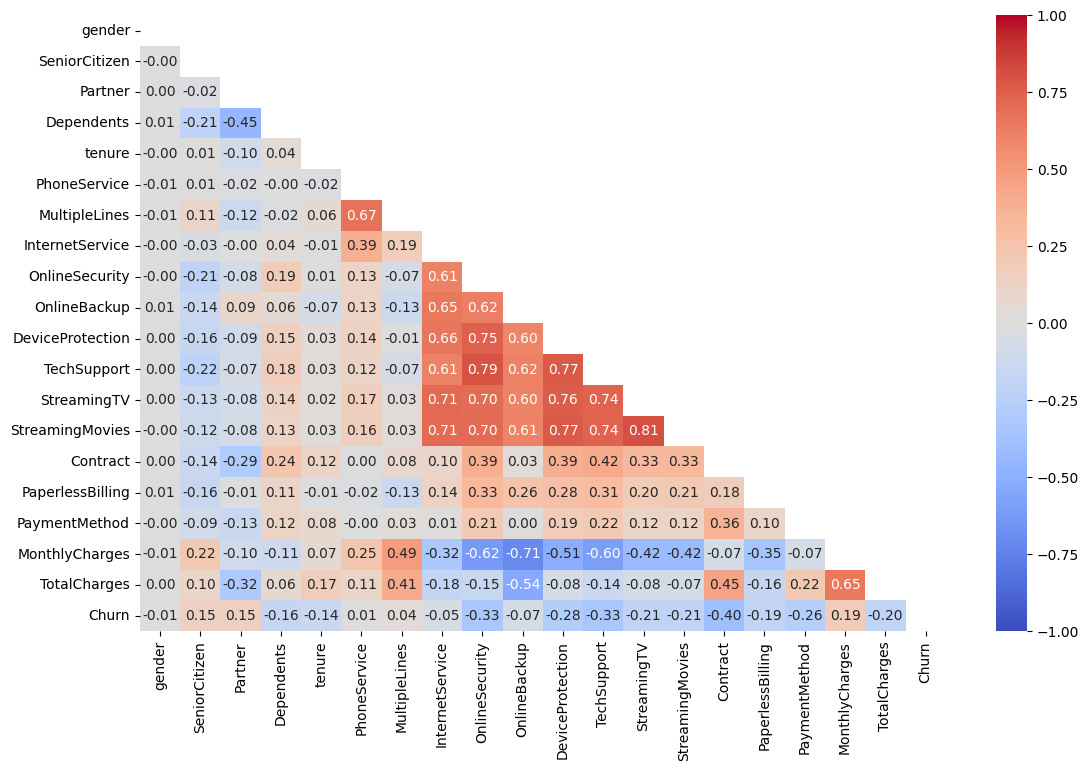

In [31]:
plt.figure(figsize=(13,8))
corr=df.apply(lambda x:pd.factorize(x)[0] if x.dtype!= 'float64' else x).corr()
mask = np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr, mask=mask, cmap ='coolwarm', vmax=1, vmin=-1, center =0, annot=True, fmt='.2f')

## Label Encoder 


In [32]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [33]:
cat_cols=[col for col in df.columns if df[col].dtype=='object']
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [34]:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head(2) 
   

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0


In [35]:
# perform log transformation

df['MonthlyCharges']= np.log(df['MonthlyCharges']+1)
df['TotalCharges']= np.log(df['TotalCharges']+1)

<Axes: xlabel='TotalCharges', ylabel='Density'>

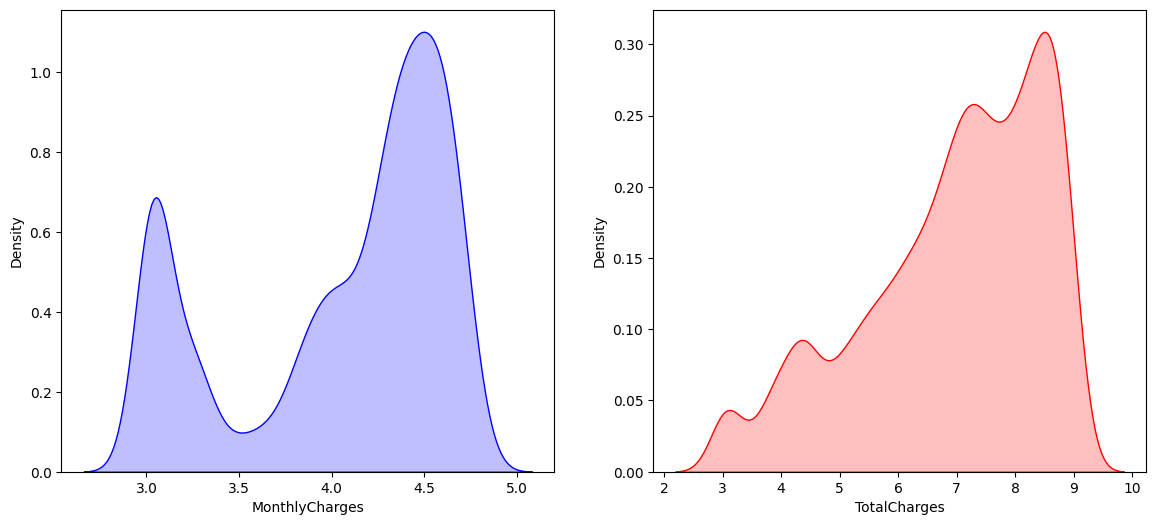

In [36]:
fig, axes = plt.subplots(1,2, figsize= (14,6))
sns.kdeplot(df['MonthlyCharges'], ax= axes[0], color='blue', shade=True)
sns.kdeplot(df['TotalCharges'], ax= axes[1], color='red', shade=True)


## Train Test Split


In [37]:
x = df.drop(columns=['Churn'])
y= df['Churn']

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

## Model Training


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# initialize and train model
model= LogisticRegression()
model.fit(x_train, y_train)

# get predictions
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.61      0.52      0.56       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



In [40]:
from sklearn.ensemble import RandomForestClassifier

# initialize and train model
model= RandomForestClassifier()
model.fit(x_train, y_train)

# get predictions
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [41]:
cat_cols.remove('Churn')
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [42]:
from catboost import CatBoostClassifier

# initialize and train model
model= CatBoostClassifier(verbose=False)
model.fit(x_train, y_train,cat_features=cat_cols)

# get predictions
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



## Confusion Matrix

<Axes: >

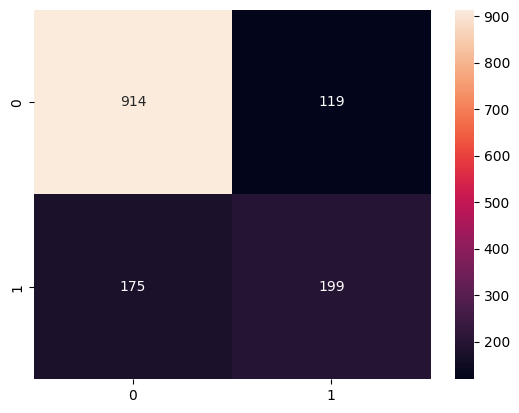

In [43]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt='d')